## مثال‌های پایه‌ای Pandas

این دفترچه شما را با برخی مفاهیم بسیار پایه‌ای Pandas آشنا می‌کند. ابتدا با وارد کردن کتابخانه‌های معمول علوم داده شروع می‌کنیم:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### سری‌ها

سری‌ها شبیه به لیست یا آرایه یک‌بعدی هستند، اما با اندیس. تمام عملیات‌ها بر اساس اندیس هماهنگ می‌شوند.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


یکی از کاربردهای رایج سری‌ها، **سری‌های زمانی** است. در سری‌های زمانی، ایندکس دارای ساختار خاصی است - معمولاً یک محدوده از تاریخ‌ها یا زمان‌ها. ما می‌توانیم چنین ایندکسی را با استفاده از `pd.date_range` ایجاد کنیم.

فرض کنید یک سری داریم که مقدار محصول خریداری‌شده در هر روز را نشان می‌دهد و می‌دانیم که هر یکشنبه باید یک آیتم برای خودمان برداریم. در اینجا نحوه مدل‌سازی این موضوع با استفاده از سری‌ها آورده شده است:


Length of index is 366


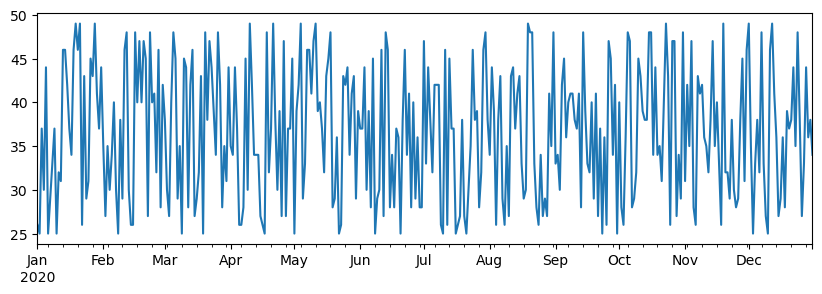

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


همانطور که می‌بینید، ما اینجا مشکلاتی داریم، زیرا در سری‌های هفتگی روزهای ذکر نشده به عنوان گم‌شده (`NaN`) در نظر گرفته می‌شوند، و اضافه کردن `NaN` به یک عدد به ما `NaN` می‌دهد. برای دریافت نتیجه صحیح، باید هنگام اضافه کردن سری‌ها مقدار `fill_value` را مشخص کنیم:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


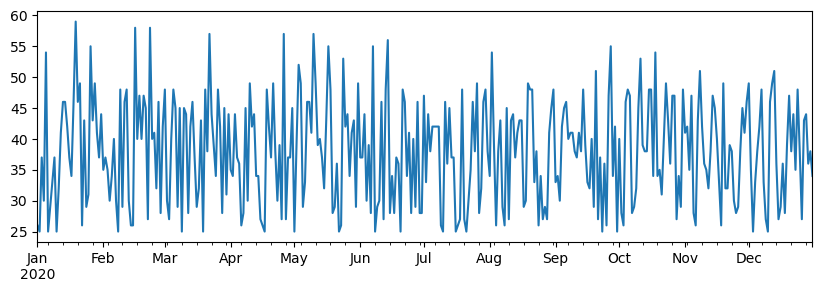

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

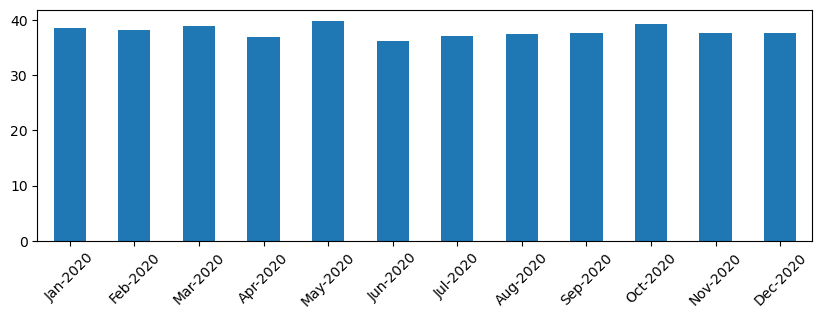

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## دیتافریم

دیتافریم در واقع مجموعه‌ای از سری‌ها با یک ایندکس مشترک است. ما می‌توانیم چندین سری را با هم ترکیب کرده و یک دیتافریم ایجاد کنیم. با توجه به سری‌های `a` و `b` که در بالا تعریف شده‌اند:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

ما همچنین می‌توانیم از سری‌ها به عنوان ستون‌ها استفاده کنیم و نام ستون‌ها را با استفاده از دیکشنری مشخص کنیم:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

همان نتیجه را می‌توان با جابجایی (و سپس تغییر نام ستون‌ها، برای مطابقت با مثال قبلی) به دست آورد:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

انتخاب ستون‌ها از DataFrame می‌تواند به این صورت انجام شود:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**انتخاب ردیف‌ها** بر اساس عبارت فیلتر:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

نحوه کار به این صورت است که عبارت `df['A']<5` یک سری بولی بازمی‌گرداند که نشان می‌دهد آیا عبارت برای هر عنصر سری `True` یا `False` است. هنگامی که سری به عنوان شاخص استفاده می‌شود، زیرمجموعه‌ای از ردیف‌ها در DataFrame بازمی‌گرداند. بنابراین استفاده از عبارت بولی دلخواه پایتون ممکن نیست، به عنوان مثال، نوشتن `df[df['A']>5 and df['A']<7]` اشتباه خواهد بود. در عوض، باید از عملیات خاص `&` روی سری بولی استفاده کنید:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

ایجاد ستون‌های قابل محاسبه جدید. ما می‌توانیم به راحتی ستون‌های قابل محاسبه جدیدی برای DataFrame خود ایجاد کنیم با استفاده از عبارات شهودی. کد زیر واگرایی A از مقدار میانگین آن را محاسبه می‌کند.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

آنچه واقعاً اتفاق می‌افتد این است که ما یک سری محاسبه می‌کنیم و سپس این سری را به سمت چپ اختصاص می‌دهیم و یک ستون دیگر ایجاد می‌کنیم.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

انتخاب ردیف‌ها بر اساس اعداد می‌تواند با استفاده از ساختار `iloc` انجام شود. برای مثال، برای انتخاب ۵ ردیف اول از DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**گروه‌بندی** اغلب برای دستیابی به نتیجه‌ای مشابه *جدول‌های محوری* در اکسل استفاده می‌شود. فرض کنید که می‌خواهیم مقدار میانگین ستون `A` را برای هر عدد داده شده از `LenB` محاسبه کنیم. سپس می‌توانیم DataFrame خود را بر اساس `LenB` گروه‌بندی کرده و `mean` را فراخوانی کنیم:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

اگر نیاز داشته باشیم میانگین و تعداد عناصر در گروه را محاسبه کنیم، می‌توانیم از تابع پیچیده‌تر `aggregate` استفاده کنیم:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## چاپ و ترسیم

دانشمندان داده اغلب نیاز دارند داده‌ها را بررسی کنند، بنابراین توانایی بصری‌سازی آن بسیار مهم است. وقتی DataFrame بزرگ است، بسیاری از مواقع فقط می‌خواهیم مطمئن شویم که همه چیز را به درستی انجام می‌دهیم، با چاپ کردن چند ردیف اول. این کار را می‌توان با فراخوانی `df.head()` انجام داد. اگر این دستور را از Jupyter Notebook اجرا کنید، DataFrame را به صورت یک جدول مرتب نمایش می‌دهد.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

ما همچنین استفاده از تابع `plot` را برای تجسم برخی ستون‌ها مشاهده کرده‌ایم. در حالی که `plot` برای بسیاری از وظایف بسیار مفید است و از انواع مختلف نمودارها از طریق پارامتر `kind=` پشتیبانی می‌کند، شما همیشه می‌توانید از کتابخانه خام `matplotlib` برای رسم نمودارهای پیچیده‌تر استفاده کنید. ما تجسم داده‌ها را به طور مفصل در درس‌های جداگانه دوره پوشش خواهیم داد.


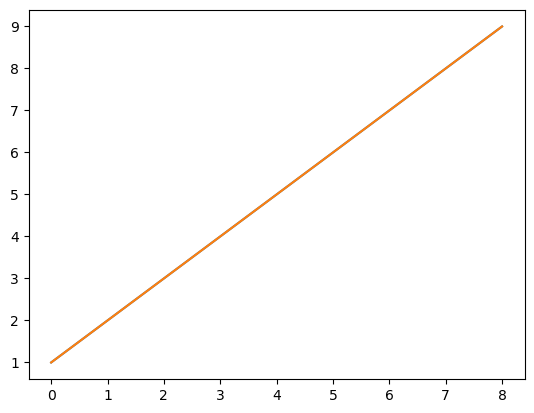

In [61]:
df['A'].plot()
plt.show()

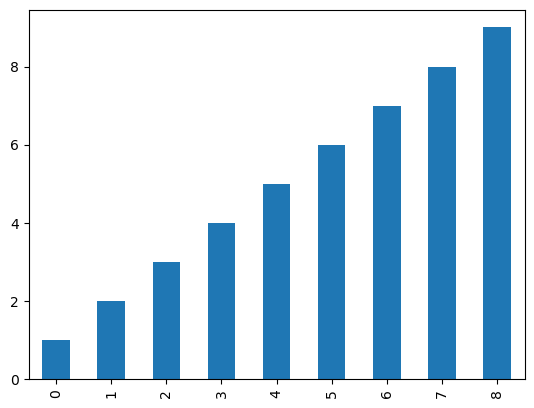

In [63]:
df['A'].plot(kind='bar')
plt.show()

این مرور کلی مهم‌ترین مفاهیم کتابخانه Pandas را پوشش می‌دهد، اما این کتابخانه بسیار غنی است و هیچ محدودیتی برای کارهایی که می‌توانید با آن انجام دهید وجود ندارد! حالا بیایید این دانش را برای حل یک مشکل خاص به کار ببریم.



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوء تفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
